In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import pickle, time

# pd.set_option("display.max_columns", 100)

In [5]:
total_df = pd.read_csv("filtered_data/Filtered_data.csv")

"""
GAUSSIAN FITTING PARAMETERS:  [1082.87958417 5281.05639135   17.41624361]
"""
mean = 5281.05639135
sig = 17.41624361


signal = total_df[(total_df["B0_MM"] > mean - 3*sig) & (total_df["B0_MM"] < mean + 3*sig)]
print("Number of signal events: ", len(signal))

bg = total_df[total_df["B0_MM"] > mean + 3*sig]
print("Number of combinatorial background events: ", len(bg))

# labels for decision trees (0 - background; 1 - signal)
vals = np.concatenate([np.zeros(len(bg)), np.ones(len(signal))])
print("Length of labels array", len(vals))

#bg = bg.drop(list(set(bg.columns) - set(signal.columns) - set(['year', 'polarity'])), axis = 1) # Gets rid of all extra columns

# (X - independent; Y - dependent) variables for the decision tree classifier
X = bg.append(signal) # concatenation of the two dataframes


Number of signal events:  33643
Number of combinatorial background events:  1734
Length of labels array 35377


In [6]:
#print(X.columns)

In [7]:
to_leave = set(['mu_plus_P', 'mu_plus_PT', 'mu_plus_ETA', 'mu_plus_PHI', 'mu_plus_PE',
       'mu_plus_PX', 'mu_plus_PY', 'mu_plus_PZ', 'mu_plus_IPCHI2_OWNPV',
       'mu_minus_P', 'mu_minus_PT', 'mu_minus_ETA', 'mu_minus_PHI',
       'mu_minus_PE', 'mu_minus_PX', 'mu_minus_PY', 'mu_minus_PZ',
       'mu_minus_IPCHI2_OWNPV', 'K_P', 'K_PT', 'K_ETA', 'K_PHI', 'K_PE',
       'K_PX', 'K_PY', 'K_PZ', 'K_IPCHI2_OWNPV', 'Pi_P', 'Pi_PT', 'Pi_ETA',
       'Pi_PHI', 'Pi_PE', 'Pi_PX', 'Pi_PY', 'Pi_PZ', 'Pi_IPCHI2_OWNPV',
       'B0_ENDVERTEX_CHI2', 'B0_ENDVERTEX_NDOF', 'B0_FDCHI2_OWNPV', 'Kstar_MM',
       'Kstar_ENDVERTEX_CHI2', 'Kstar_ENDVERTEX_NDOF', 'Kstar_FDCHI2_OWNPV',
       'J_psi_MM', 'J_psi_ENDVERTEX_CHI2', 'J_psi_ENDVERTEX_NDOF',
       'J_psi_FDCHI2_OWNPV', 'B0_IPCHI2_OWNPV', 'B0_DIRA_OWNPV', 'B0_OWNPV_X',
       'B0_OWNPV_Y', 'B0_OWNPV_Z', 'B0_FD_OWNPV', 'accept_kaon', 'accept_pion', 'accept_muon'])

to_drop = list(set(X.columns) - to_leave)

X = X.drop(to_drop, axis = 1) # dropping columns that have not effect, but may have NaN or other inappropriate data

Y = vals

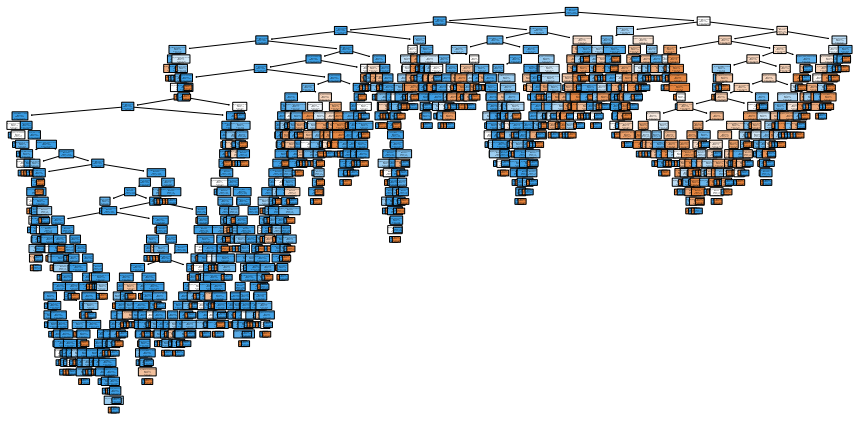

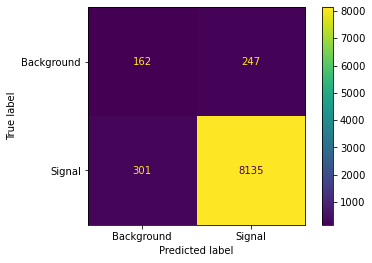

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y) # splitting data into test and train samples
clf_dt = DecisionTreeClassifier() # creating a Decision Tree
clf_dt = clf_dt.fit(X_train, Y_train) # training it

# Plotting a resulting decision tree
plt.figure(figsize = (15, 7.5))
plot_tree(clf_dt,
         filled = True,
         rounded = True,
         class_names = ["Bg", "Sig"],
         feature_names = X.columns)

# Plotting a confusion matrix, which will check on the test data false-positive and false-negative identifications
plot_confusion_matrix(clf_dt, X_test, Y_test, display_labels = ["Background", "Signal"])

<h3>Next section investigates overfitting prevention</h3>

<h3>End of investigation</h3>

In [9]:
path = clf_dt.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1] # last one should be removed

print(ccp_alphas)
print(len(ccp_alphas))

[0.00000000e+00 2.51150941e-05 2.82543169e-05 3.58058194e-05
 3.58955583e-05 3.61199055e-05 3.61827227e-05 3.62943978e-05
 3.64339917e-05 3.66984852e-05 3.67929472e-05 3.68086909e-05
 3.68138168e-05 3.68884142e-05 3.69439929e-05 3.69655220e-05
 3.69923670e-05 3.70432918e-05 3.70551058e-05 3.71192705e-05
 3.71480292e-05 3.72520765e-05 3.73958804e-05 3.74242868e-05
 3.74304028e-05 3.74365292e-05 3.74552613e-05 3.74686283e-05
 3.74699249e-05 3.75706843e-05 3.76064956e-05 3.76307938e-05
 3.76377567e-05 3.76573396e-05 3.76903362e-05 3.76903362e-05
 3.76903362e-05 3.76903362e-05 3.76903362e-05 3.76903362e-05
 3.76903362e-05 3.76903362e-05 3.76903362e-05 3.76903362e-05
 3.76903362e-05 3.76903362e-05 3.77932190e-05 3.77934471e-05
 4.02761105e-05 4.14542834e-05 4.30403930e-05 4.31652746e-05
 4.44468248e-05 4.59172812e-05 4.88663058e-05 4.90912410e-05
 4.93339450e-05 5.02537816e-05 5.02537816e-05 5.02537816e-05
 5.02537816e-05 5.02537816e-05 5.02537816e-05 5.02537816e-05
 5.02537816e-05 5.025378

Starting alpha num:  0
Execution time for alpha:  18.105048418045044
Starting alpha num:  1
Execution time for alpha:  17.84895920753479
Starting alpha num:  2
Execution time for alpha:  18.231075763702393
Starting alpha num:  3
Execution time for alpha:  18.312984704971313
Starting alpha num:  4
Execution time for alpha:  17.829989194869995
Starting alpha num:  5
Execution time for alpha:  17.871633291244507
Starting alpha num:  6
Execution time for alpha:  18.490628480911255
Starting alpha num:  7
Execution time for alpha:  18.046809911727905
Starting alpha num:  8
Execution time for alpha:  18.010407209396362
Starting alpha num:  9
Execution time for alpha:  18.218379974365234
Starting alpha num:  10
Execution time for alpha:  18.120712757110596
Starting alpha num:  11
Execution time for alpha:  17.804700136184692
Starting alpha num:  12
Execution time for alpha:  17.812628507614136
Starting alpha num:  13
Execution time for alpha:  18.317389726638794
Starting alpha num:  14
Executi

<AxesSubplot:xlabel='alpha'>

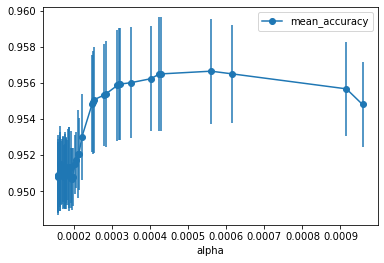

In [10]:
alpha_loop_values = []
# Check different alpha values with cross validation providing errorbars
init_time = time.time()
for num, ccp_alpha in enumerate(ccp_alphas[290:-3]): # not all alphas are used to save some time - for better precision all ccp_alphas should be looked at
    print("Starting alpha num: ", num)
    start_time = time.time()
    clf_dt = DecisionTreeClassifier(ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, Y_train, cv = 5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    print("Execution time for alpha: ", time.time() - start_time)
print("Total execution time: ", time.time() - init_time)
    
alpha_results = pd.DataFrame(alpha_loop_values, columns = ["alpha", "mean_accuracy", "std"])

alpha_results.plot(x = 'alpha', y = 'mean_accuracy', yerr = 'std', marker = 'o')

<AxesSubplot:xlabel='alpha'>

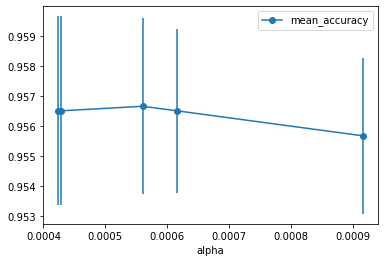

In [12]:
# find the best alpha in terms of absolute accuracy and its error
alpha_results[42:-1].plot(x = 'alpha', y = 'mean_accuracy', yerr = 'std', marker = 'o')


0.0005600640166074184


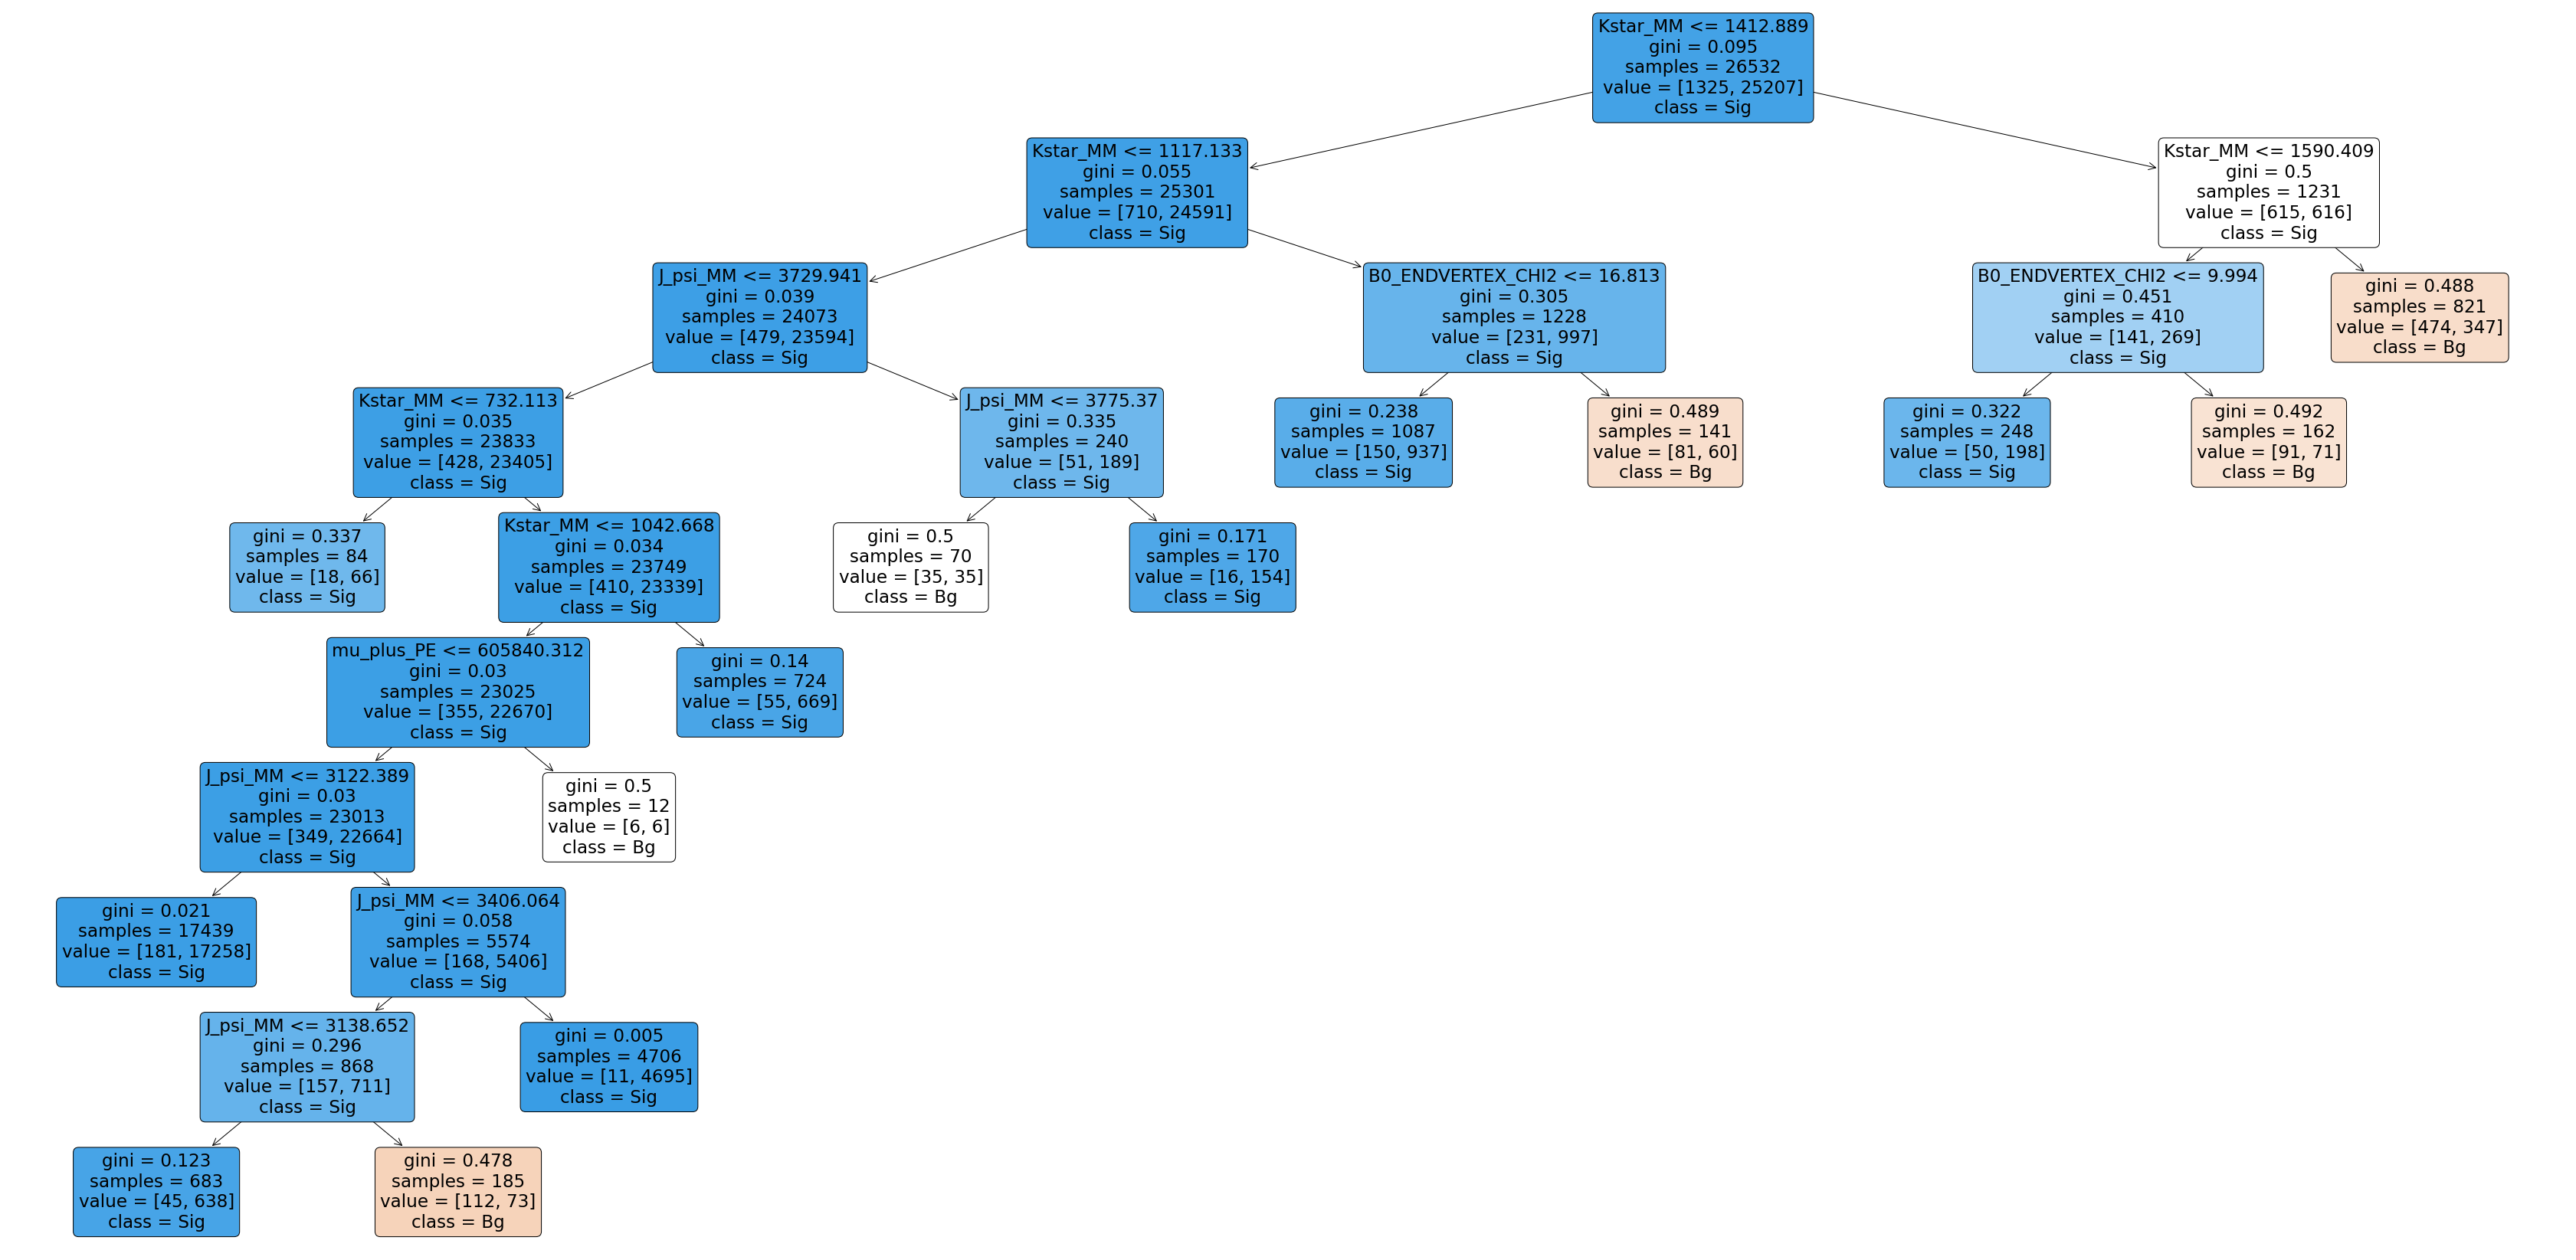

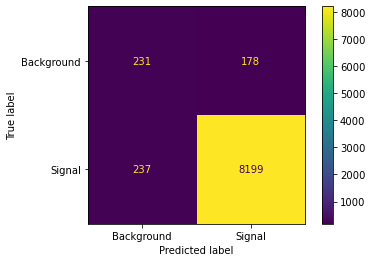

In [13]:
# Extract the best value of alpha
ideal_alpha = ccp_alphas[(ccp_alphas > 0.0005) & (ccp_alphas < 0.0006)][0]
ideal_alpha = float(ideal_alpha)
print(ideal_alpha)

# Resulting decision tree with the ccp_alpha being used to prevent overfitting
clf_dt = DecisionTreeClassifier(ccp_alpha = ideal_alpha)
clf_dt = clf_dt.fit(X_train, Y_train)

plt.figure(figsize = (60, 30))
plot_tree(clf_dt,
         filled = True,
         rounded = True,
         class_names = ["Bg", "Sig"],
         feature_names = X.columns)

# Corresponding confusion matrix
plot_confusion_matrix(clf_dt, X_test, Y_test, display_labels = ["Background", "Signal"])

In [14]:
"""
43.5% false-positive (56.5% of bg is filtered out)
2.8% false-negative
"""

print(X.columns)

with open("trees/tree_combinatorial", 'wb') as f: # exporting decision tree to 'tree_combinatorial' binary file
    pickle.dump(clf_dt, f)

Index(['mu_plus_P', 'mu_plus_PT', 'mu_plus_ETA', 'mu_plus_PHI', 'mu_plus_PE',
       'mu_plus_PX', 'mu_plus_PY', 'mu_plus_PZ', 'mu_plus_IPCHI2_OWNPV',
       'mu_minus_P', 'mu_minus_PT', 'mu_minus_ETA', 'mu_minus_PHI',
       'mu_minus_PE', 'mu_minus_PX', 'mu_minus_PY', 'mu_minus_PZ',
       'mu_minus_IPCHI2_OWNPV', 'K_P', 'K_PT', 'K_ETA', 'K_PHI', 'K_PE',
       'K_PX', 'K_PY', 'K_PZ', 'K_IPCHI2_OWNPV', 'Pi_P', 'Pi_PT', 'Pi_ETA',
       'Pi_PHI', 'Pi_PE', 'Pi_PX', 'Pi_PY', 'Pi_PZ', 'Pi_IPCHI2_OWNPV',
       'B0_ENDVERTEX_CHI2', 'B0_ENDVERTEX_NDOF', 'B0_FDCHI2_OWNPV', 'Kstar_MM',
       'Kstar_ENDVERTEX_CHI2', 'Kstar_ENDVERTEX_NDOF', 'Kstar_FDCHI2_OWNPV',
       'J_psi_MM', 'J_psi_ENDVERTEX_CHI2', 'J_psi_ENDVERTEX_NDOF',
       'J_psi_FDCHI2_OWNPV', 'B0_IPCHI2_OWNPV', 'B0_DIRA_OWNPV', 'B0_OWNPV_X',
       'B0_OWNPV_Y', 'B0_OWNPV_Z', 'B0_FD_OWNPV', 'accept_kaon', 'accept_pion',
       'accept_muon'],
      dtype='object')


In [15]:
data = X
model = None
with open("trees/tree_combinatorial", 'rb') as f:
    model = pickle.load(f)

In [16]:
to_leave = set(['mu_plus_P', 'mu_plus_PT', 'mu_plus_ETA', 'mu_plus_PHI', 'mu_plus_PE',
       'mu_plus_PX', 'mu_plus_PY', 'mu_plus_PZ', 'mu_plus_IPCHI2_OWNPV',
       'mu_minus_P', 'mu_minus_PT', 'mu_minus_ETA', 'mu_minus_PHI',
       'mu_minus_PE', 'mu_minus_PX', 'mu_minus_PY', 'mu_minus_PZ',
       'mu_minus_IPCHI2_OWNPV', 'K_P', 'K_PT', 'K_ETA', 'K_PHI', 'K_PE',
       'K_PX', 'K_PY', 'K_PZ', 'K_IPCHI2_OWNPV', 'Pi_P', 'Pi_PT', 'Pi_ETA',
       'Pi_PHI', 'Pi_PE', 'Pi_PX', 'Pi_PY', 'Pi_PZ', 'Pi_IPCHI2_OWNPV',
       'B0_ENDVERTEX_CHI2', 'B0_ENDVERTEX_NDOF', 'B0_FDCHI2_OWNPV', 'Kstar_MM',
       'Kstar_ENDVERTEX_CHI2', 'Kstar_ENDVERTEX_NDOF', 'Kstar_FDCHI2_OWNPV',
       'J_psi_MM', 'J_psi_ENDVERTEX_CHI2', 'J_psi_ENDVERTEX_NDOF',
       'J_psi_FDCHI2_OWNPV', 'B0_IPCHI2_OWNPV', 'B0_DIRA_OWNPV', 'B0_OWNPV_X',
       'B0_OWNPV_Y', 'B0_OWNPV_Z', 'B0_FD_OWNPV', 'accept_kaon', 'accept_pion', 'accept_muon'])

to_drop = set(total_df.columns) - to_leave

predict_df = total_df.drop(to_drop, axis = 1)

res = model.predict(predict_df)

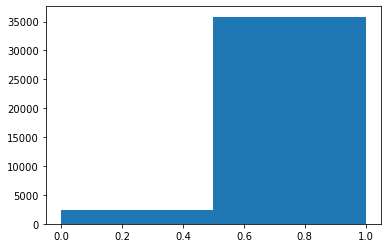

In [17]:
plt.hist(res, bins = 2)
plt.show()

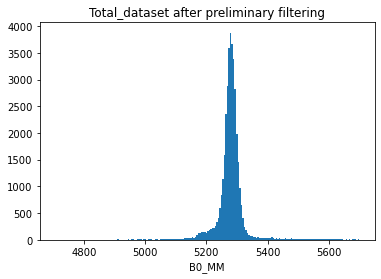

In [18]:

total_df["res"] = res

plt.title("Total_dataset after preliminary filtering")
plt.hist(total_df["B0_MM"], bins = 200)
plt.xlabel("B0_MM")
plt.show()

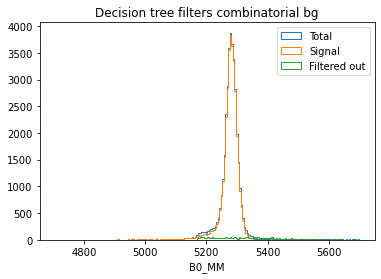

In [19]:
plt.title("Decision tree filters combinatorial bg")
plt.hist(total_df["B0_MM"], bins = 200, histtype = "step", label = "Total")
plt.hist(total_df[total_df["res"] == 1]["B0_MM"], bins = 200, histtype = "step", label = "Signal")
plt.hist(total_df[total_df["res"] == 0]["B0_MM"], bins = 200, histtype = "step", label = "Filtered out")
plt.xlabel("B0_MM")
plt.legend()
plt.show()